In [20]:
from data_class import DataClass
from linear_noise_scheduler import LinearNoiseScheduler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

In [21]:
IMG_SIZE = 64
BATCH_SIZE = 128

data_class = DataClass(IMG_SIZE)
data = data_class.load_transformed_dataset()
dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified


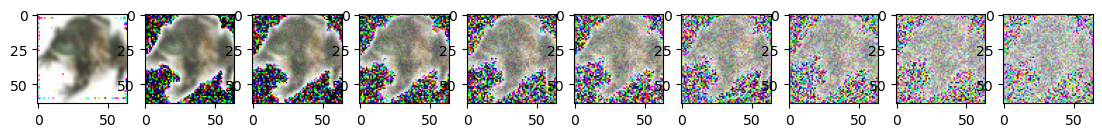

In [35]:
image = next(iter(dataloader))[0]

plt.figure(figsize=(15, 15))
num_images = 10
T = 300 # timesteps
stepsize = int(T/num_images)
scheduler = LinearNoiseScheduler(T)

for i in range(0, T, stepsize):
    t = torch.Tensor([i]).type(torch.int64)
    plt.subplot(1, num_images+1, int(i/stepsize) + 1)
    img, noise = scheduler.add_noise(image, t)
    data_class.show_tensor_image(img)